In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('onlinefraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4577389,328,PAYMENT,19200.48,C1822349986,0.00,0.00,M31903967,0.00,0.00,0,0
2043473,181,CASH_IN,188832.58,C1608505642,3405505.01,3594337.58,C219379373,12256829.90,12067997.33,0,0
4121028,302,CASH_OUT,321747.99,C1575168894,20830.00,0.00,C1528640952,0.00,321747.99,0,0
2619027,208,CASH_IN,359655.28,C1566622092,5465.00,365120.28,C790977068,63070.38,0.00,0,0
979225,44,CASH_OUT,183269.86,C855531482,0.00,0.00,C1434091249,490380.84,673650.70,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df = df.drop('isFlaggedFraud', axis=1)

In [9]:
df.shape

(6362620, 11)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Univarate EDA Analysis

In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: ylabel='count'>

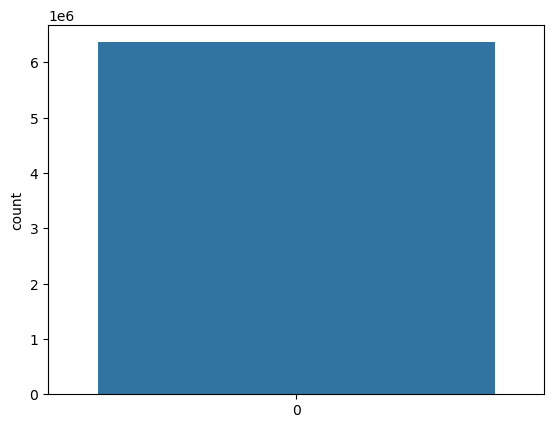

In [12]:
sns.countplot(df['isFraud'])

<Axes: xlabel='type'>

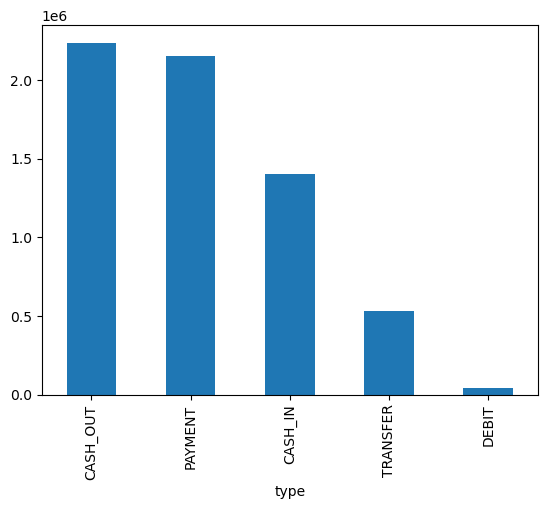

In [13]:
df['type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

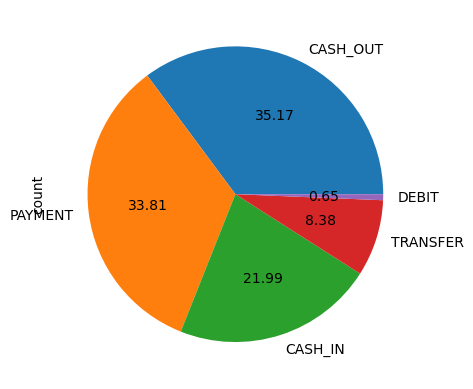

In [14]:
df['type'].value_counts().plot(kind='pie', autopct='%.2f')

In [15]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

# Numerical Data EDA

## Histogram

(array([6.052228e+06, 2.068800e+05, 5.388100e+04, 3.326200e+04,
        1.488700e+04, 1.449000e+03, 2.300000e+01, 6.000000e+00,
        2.000000e+00, 2.000000e+00]),
 array([       0.   ,  5958504.037, 11917008.074, 17875512.111,
        23834016.148, 29792520.185, 35751024.222, 41709528.259,
        47668032.296, 53626536.333, 59585040.37 ]),
 <BarContainer object of 10 artists>)

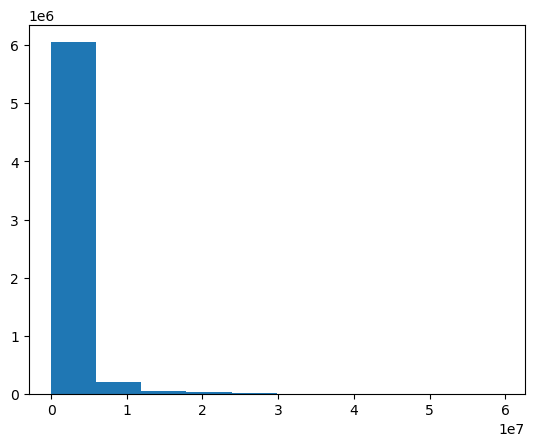

In [16]:
plt.hist(df['oldbalanceOrg'])

(array([6.356476e+06, 5.190000e+03, 5.330000e+02, 2.560000e+02,
        8.700000e+01, 5.200000e+01, 1.900000e+01, 6.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([       0.        ,  9244551.664     , 18489103.328     ,
        27733654.992     , 36978206.656     , 46222758.32000001,
        55467309.984     , 64711861.648     , 73956413.312     ,
        83200964.97600001, 92445516.64      ]),
 <BarContainer object of 10 artists>)

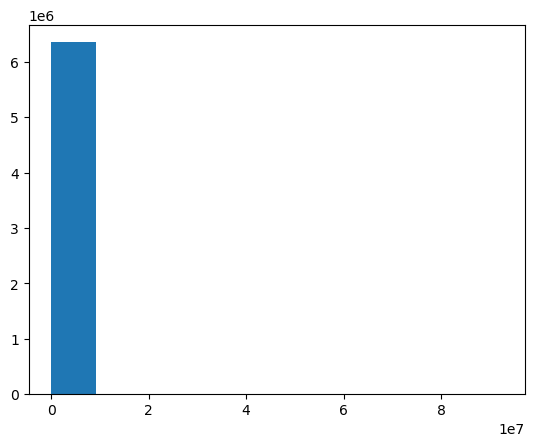

In [19]:
plt.hist(df['amount'])

(array([6.356677e+06, 4.333000e+03, 8.960000e+02, 3.940000e+02,
        1.790000e+02, 6.300000e+01, 3.100000e+01, 2.500000e+01,
        1.000000e+01, 1.200000e+01]),
 array([0.00000000e+00, 3.56015889e+07, 7.12031779e+07, 1.06804767e+08,
        1.42406356e+08, 1.78007945e+08, 2.13609534e+08, 2.49211123e+08,
        2.84812711e+08, 3.20414300e+08, 3.56015889e+08]),
 <BarContainer object of 10 artists>)

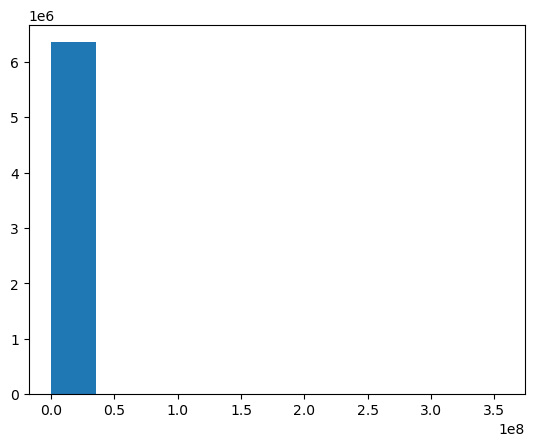

In [20]:
plt.hist(df['oldbalanceDest'])

## DistPlot

/var/folders/zk/l_pq96ms1qvfyjkxyzyz0qgm0000gn/T/ipykernel_9089/1086040597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amount', ylabel='Density'>

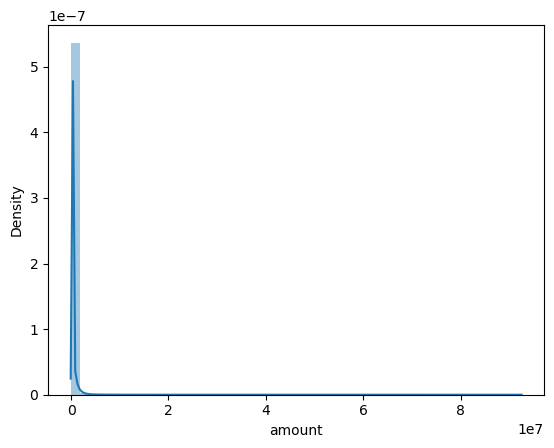

In [21]:
sns.distplot(df['amount'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amount', ylabel='Density'>

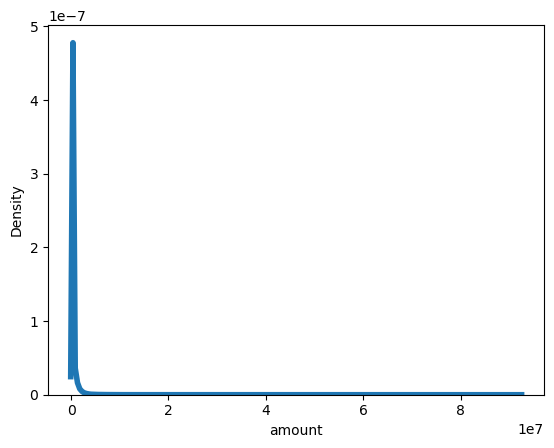

In [22]:
sns.kdeplot(df['amount'], linewidth=4)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='isFraud', ylabel='Density'>

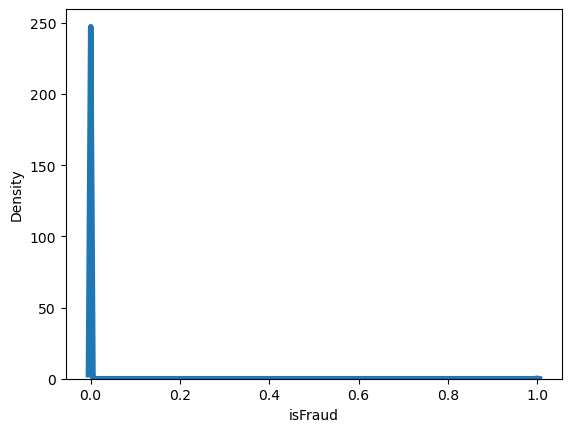

In [31]:
sns.kdeplot(df['isFraud'], linewidth=4)

## BOX PLOT

<Axes: >

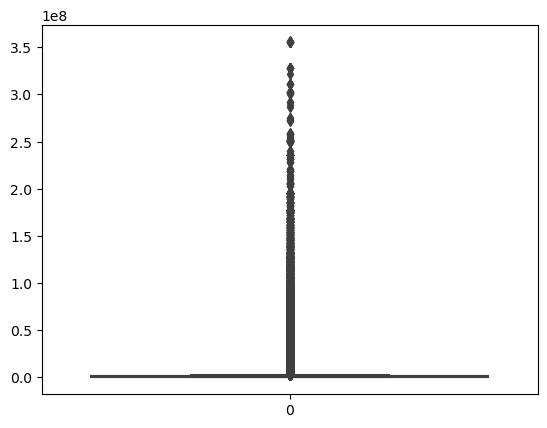

In [23]:
sns.boxplot(df['newbalanceDest'])

Minimum and Maximum Values

In [17]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print('Name:',i)
    print('Minimum:',df[i].min())
    print('Maximum',df[i].max())
    print('\n')

Name: step
Minimum: 1
Maximum 743


Name: amount
Minimum: 0.0
Maximum 92445516.64


Name: oldbalanceOrg
Minimum: 0.0
Maximum 59585040.37


Name: newbalanceOrig
Minimum: 0.0
Maximum 49585040.37


Name: oldbalanceDest
Minimum: 0.0
Maximum 356015889.35


Name: newbalanceDest
Minimum: 0.0
Maximum 356179278.92




## Check for Skew.

In [18]:
df['isFraud'].skew()

27.779538153063452

## Bivariate analysis

In [19]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


<Axes: xlabel='isFraud', ylabel='type'>

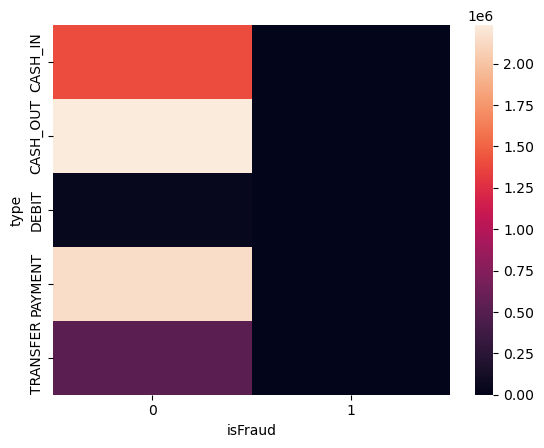

In [20]:
sns.heatmap(pd.crosstab(index=df.type,columns=df.isFraud))

In [ ]:
(df.groupby('type').mean()['isFraud']*100)

In [ ]:
sns.pariplot(df,hue='isFraud')

In [22]:
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.3/657.3 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d51328a31e079a0aa5d3a4dc0c73806560a3ffb09df6f2734032cccb56ce0ef1
  Stored in directory: /Users/vatsal/Library/Caches/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [28]:
!pip install numba==0.58.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 50.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.42.0
    Uninstalling llvmlite-0.42.0:
      Successfully uninstalled llvmlite-0.42.0
  Attempting uninstall: numba
    Found existing installation: numba 0.59.0
    Uninstalling numba-0.59.0:
      Successfully uninstalled numba-0.59.0


In [29]:
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

AttributeError: module 'numba' has no attribute 'generated_jit'